In [0]:
!apt update
!apt install -y cmake
!pip install face_recognition
import face_recognition

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Get:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic/main amd64 Packages [27.3 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [264 kB]
Get:14 http://security.ubuntu.com/ubuntu bionic-security/univ

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import glob
# https://drive.google.com/open?id=1JW9R_JQLRGe7nfvSPTb03oqkFvsREe0_
flist = glob.glob("/gdrive/My Drive/known_person/*")
flist

['/gdrive/My Drive/known_person/Eason.jpg',
 '/gdrive/My Drive/known_person/Jay.jpg',
 '/gdrive/My Drive/known_person/Chiling.jpeg',
 '/gdrive/My Drive/known_person/Yui.jpg']

In [0]:
import glob
# https://drive.google.com/open?id=171j0YaGP1YY5EHpN_KTG-znw9nuGjdd3
unknown_flist = glob.glob("/gdrive/My Drive/unknown_person/*")
unknown_flist

['/gdrive/My Drive/unknown_person/unknown2.jpg',
 '/gdrive/My Drive/unknown_person/unknown3.jpg',
 '/gdrive/My Drive/unknown_person/unknown1.jpeg',
 '/gdrive/My Drive/unknown_person/unknown6.jpg',
 '/gdrive/My Drive/unknown_person/unknown7.jpeg',
 '/gdrive/My Drive/unknown_person/unknown8.jpg',
 '/gdrive/My Drive/unknown_person/unknown9.jpg',
 '/gdrive/My Drive/unknown_person/unknown10.jpg',
 '/gdrive/My Drive/unknown_person/unknown5.jpg',
 '/gdrive/My Drive/unknown_person/unknown4.jpeg']

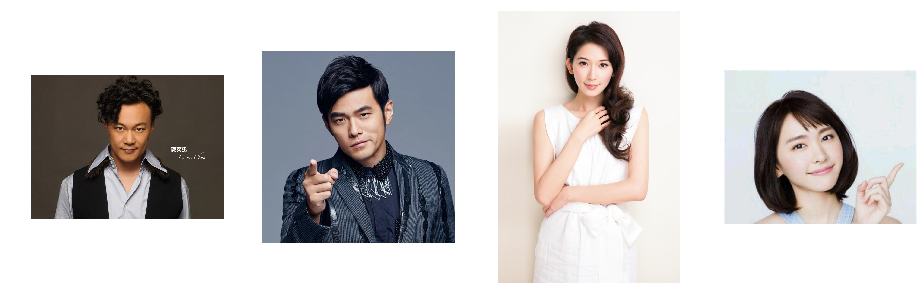

In [0]:
import face_recognition
# 圖像函式庫: PIL(basic) OpenCV(advanced)
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os
encodinglist = []
labels = []

width = 5
height = int(len(flist) / width) + 1
plt.figure(figsize=(20, 5))
for (i, f) in enumerate(flist):
  # Step1. 讀取檔案
  img = face_recognition.load_image_file(f)
  # Step2. 把臉的降維向量算出, 用已經做好的cnn, [0]第一張臉
  face_encoding = face_recognition.face_encodings(img)[0]
  # Step3. 抓出臉的方框
  (top, right, bottom, left) = face_recognition.face_locations(img, model="cnn")[0]
  # Step4. 把它加到我自己準備的list裡
  encodinglist.append(face_encoding)
  # Step5. 把檔名前面的人名split出來
  name = os.path.split(f)[-1].split(".")[0]
  # Step6. 把人名到我自己準備的list
  labels.append(name)
  plt.subplot(height, width, i + 1)
  plt.axis("off")
  plt.imshow(img)

In [0]:
# 秀一下志玲的臉降維過後的向量
encodinglist[2]

array([-0.04509998,  0.02732648,  0.12371893, -0.07578281, -0.1269079 ,
       -0.02014869, -0.10274996, -0.09153797,  0.13545731, -0.20694704,
        0.25439894, -0.07709688, -0.17507979, -0.02816851, -0.08011094,
        0.20661794, -0.20426928, -0.20284784, -0.05412045,  0.04327369,
        0.07854953,  0.04034474, -0.01418125,  0.04357044, -0.10654317,
       -0.365493  , -0.05965842, -0.03572619,  0.03467795, -0.12136626,
       -0.11177423,  0.00897149, -0.20707262, -0.00466773,  0.03816229,
        0.15581645,  0.04378111, -0.20787106,  0.1118338 , -0.00653945,
       -0.37158725,  0.04260335,  0.05478308,  0.17682058,  0.18219377,
       -0.02709193, -0.04261392, -0.21085981,  0.15058622, -0.19165374,
        0.02137787,  0.10095278,  0.11072788,  0.05710011,  0.0125571 ,
       -0.15987192,  0.03314117,  0.16100317, -0.17165177, -0.03669655,
        0.02461203, -0.05417451,  0.08733688, -0.14498682,  0.18324938,
        0.13916758, -0.09947978, -0.25419062,  0.14428289, -0.18

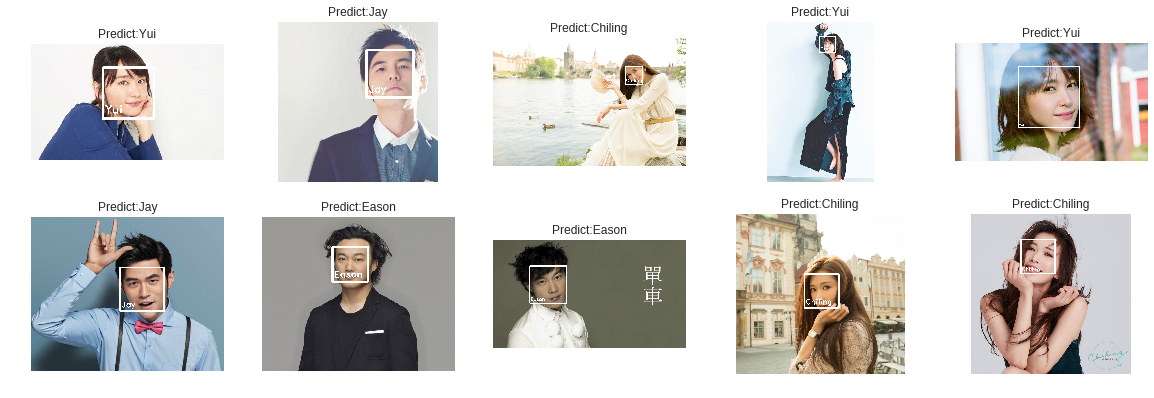

In [0]:
import numpy as np
plt.figure(figsize=(20, 10))
width = 5
height = int(len(unknown_flist) / width) + 1
for (i, f) in enumerate(unknown_flist):
  img = face_recognition.load_image_file(f)
  face_encoding = face_recognition.face_encodings(img)[0]
  # (top, right, bottom, left)
  (top, right, bottom, left) = face_recognition.face_locations(img, model="cnn")[0]
  # rectangle(要畫的圖, 左上作標, 右下作標, 顏色, 粗細)
  cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 255), 5)
  font = cv2.FONT_HERSHEY_DUPLEX
  # face_distance->算跟妳傳進去的encodinglist每一個距離
  results = face_recognition.face_distance(encodinglist, face_encoding)
  name = labels[np.array(results).argmin(axis=-1)]
  labels.append(name)
  # 把文字放到我的圖上
  cv2.putText(img, name, (left + 6, bottom - 15), font, 1, (255, 255, 255), 2)
  plt.subplot(height, width, i + 1)
  plt.title("Predict:" +  name)
  plt.axis("off")
  plt.imshow(img)

In [0]:
# 妳可以把跟所有臉的距離列出來, 最小值基本上就是我們的答案
results = face_recognition.face_distance(encodinglist, face_encoding)
results

array([0.66215611, 0.6811732 , 0.39850797, 0.51087127])